In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('medicalpremium(data2).csv')

## 1. Data Information,descriptive analysis etc.

In [3]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## 2. PreProcessing


In [5]:
#Checking NULl Values

from sklearn.impute import SimpleImputer
data.isnull().sum()


Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_14444\3195945904.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 7, i + 1)


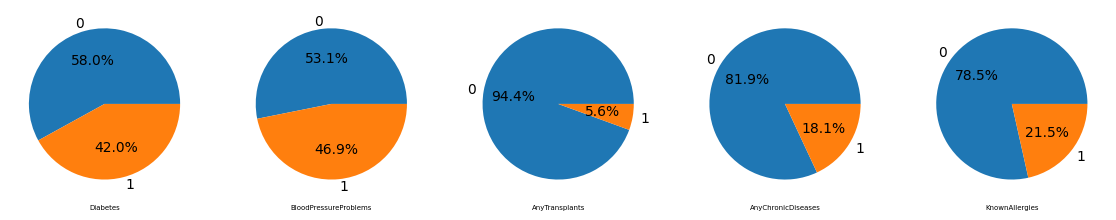

In [6]:
#Checking Imbalanced data
features = ['Diabetes','BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases','KnownAllergies']
  
plt.subplots(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(1, 7, i + 1)
  
    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.xlabel(col,fontsize = 5)
  
plt.show()

#### Above we can see the imbalance in the percentages of Transplants, chronic Disease and Known Allergies 
#### That is why we use Stratified-Shuffle-split to remove the imbalance


C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_14444\1030194185.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


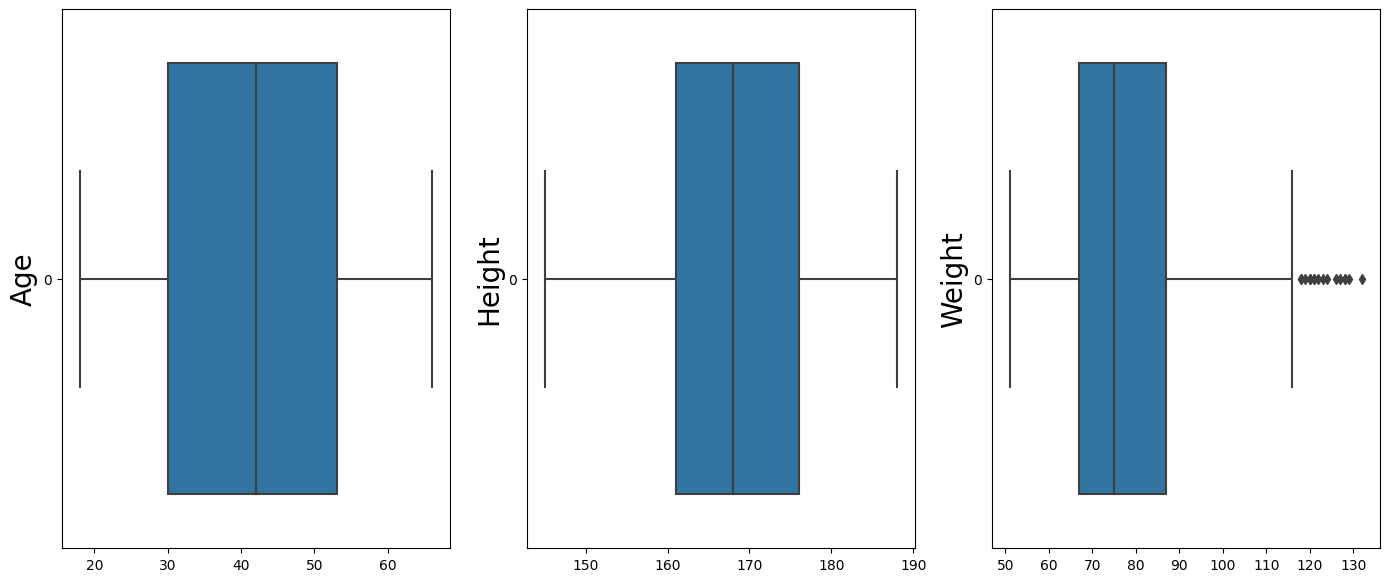

In [7]:
# Finding Outliers

features = ['Age', 'Height','Weight']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data[col], orient="h")
    plt.ylabel(col,fontsize = 20)
plt.show()

#### Here we can see some outliers in Weight so lets check their count

In [8]:
data.shape, data[data['Weight']<115].shape

##VERY LESSS SO WE DISCARD THE OUTLIERS


((986, 11), (967, 11))

In [9]:
data = data[data['Weight']<115]
data.reset_index(drop=True,inplace=True,)

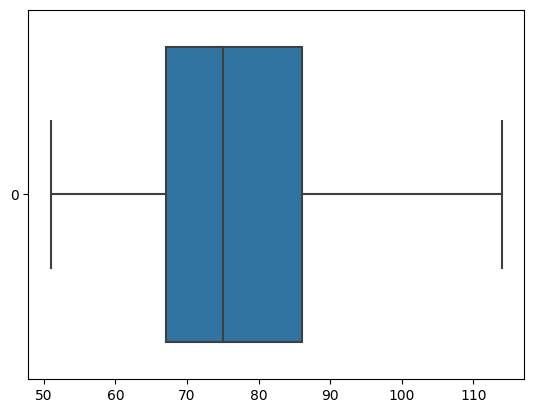

In [10]:
sns.boxplot(data['Weight'], orient="h")
plt.show()

#### All outliers removed

### 3. Analysis and plotting data

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_14444\2733659172.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


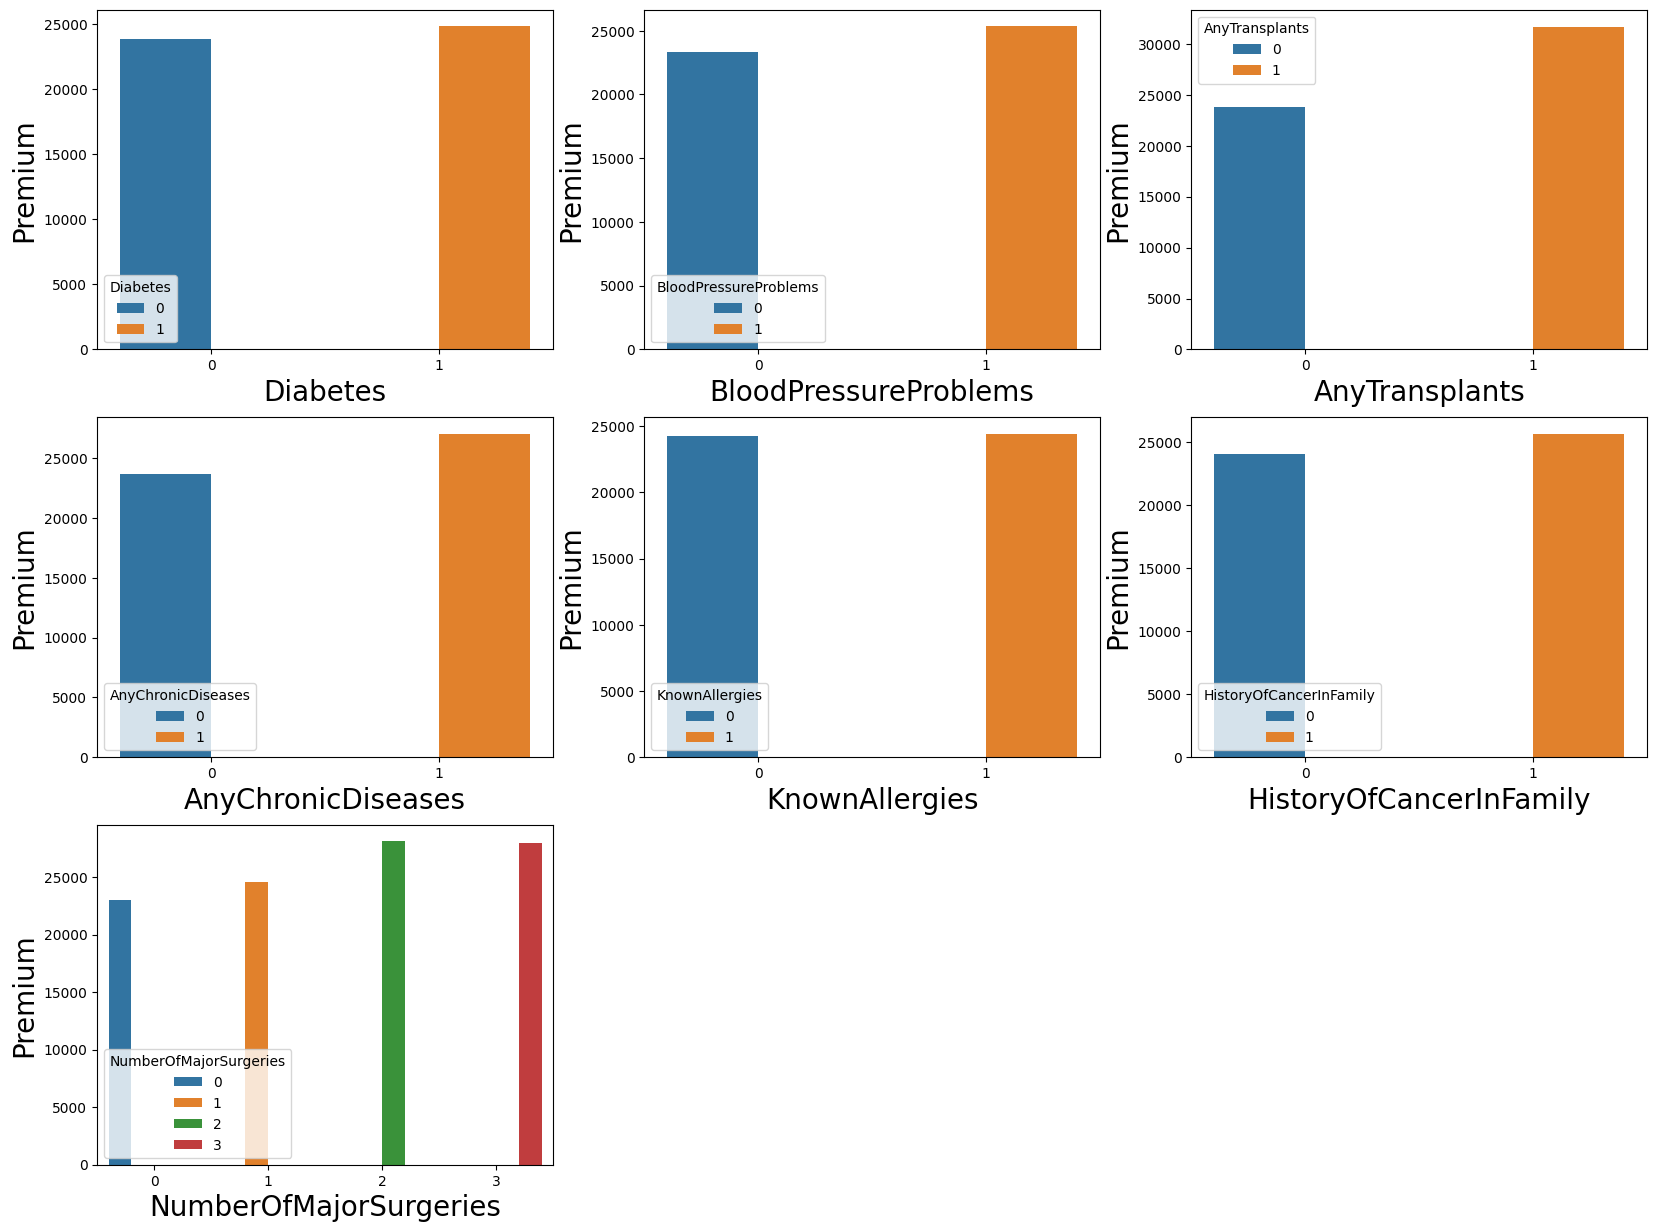

In [11]:
features = ['Diabetes','BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']
  
plt.subplots(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=data,x=col,y='PremiumPrice',hue=col,errorbar=('ci',0),width=0.8)
    plt.xlabel(col,fontsize = 20)
    plt.ylabel('Premium',fontsize = 20)
plt.show()

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_14444\1190491068.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


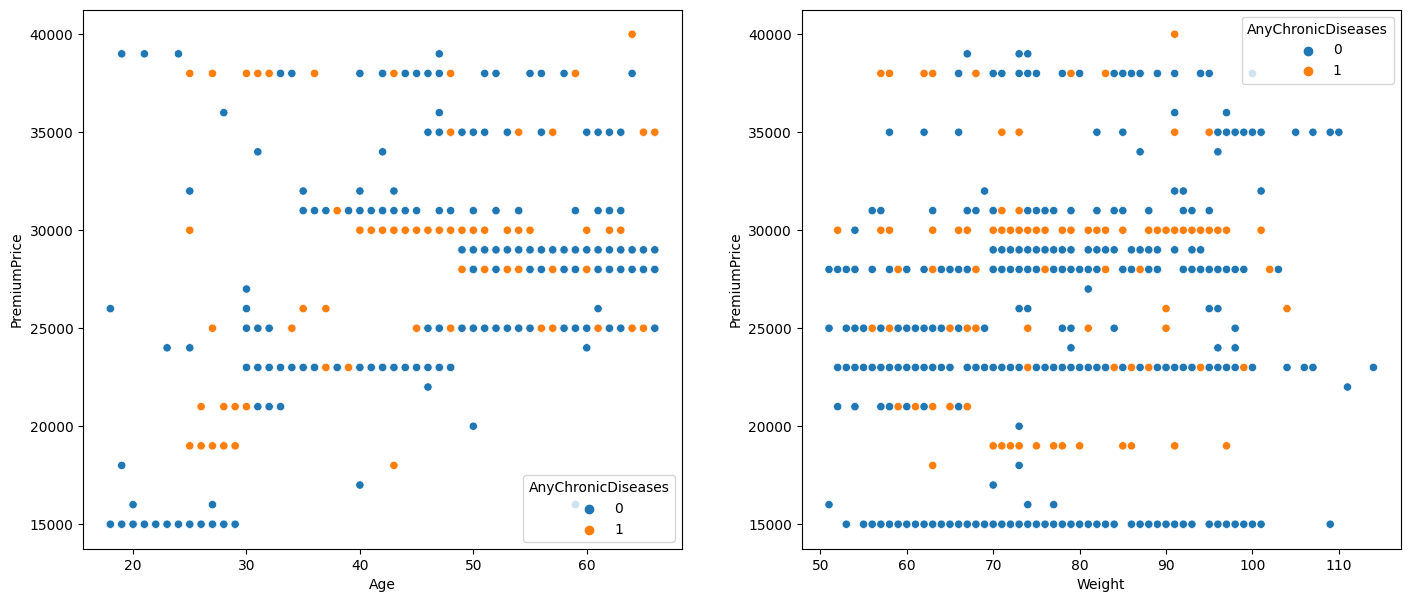

In [12]:
features = ['Age', 'Weight']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
                   y='PremiumPrice',
                   hue='AnyChronicDiseases')
plt.show()

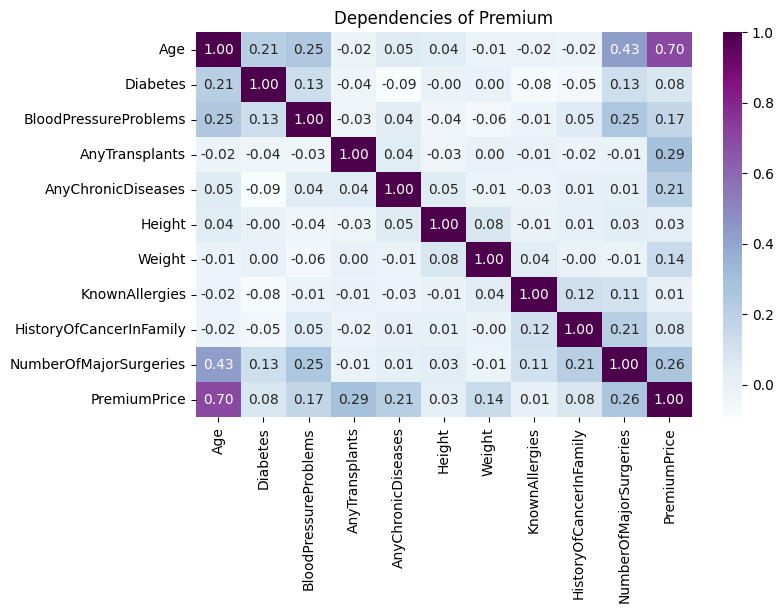

In [13]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Premium")
plt.show()

### Removing data that have min contribution in predicting Premium

In [14]:
features = ['Diabetes','Height','KnownAllergies','HistoryOfCancerInFamily']

for i in features:
    data.drop(i,axis=1,inplace=True)

In [15]:
data

,Age,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,57,0,25000
1,60,0,0,0,73,0,29000
2,36,1,0,0,59,1,23000
3,52,1,0,1,93,2,28000
4,38,0,0,1,88,1,23000
...,...,...,...,...,...,...,...
962,18,0,0,0,67,0,15000
963,64,1,0,0,70,3,28000
964,56,1,0,0,71,1,29000
965,47,1,0,0,73,1,39000


### 4. Splitting test train data

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42) 

for train_index,test_index in split.split(data,data['AnyTransplants'],data['AnyChronicDiseases']):    #solving imbalance
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [17]:
#only leaving features in X and labels in Y

X_train = train_set.drop('PremiumPrice',axis=1)
X_test =  test_set.drop('PremiumPrice',axis=1)
y_train = train_set['PremiumPrice'].copy()
y_test = test_set['PremiumPrice'].copy()

In [18]:
#Just to check jo smoker mai yes and no wale counts hai in train and test vo same proportion mai hai ya nahi
a = X_train['AnyTransplants'].value_counts()
train_ratio = a[0]/a[1]

b = X_test['AnyTransplants'].value_counts()
test_ratio = b[0]/b[1]

print(f"Transplants ratio in Train data : {train_ratio}\nTransplants ratio in Test Data : {test_ratio}")

Transplants ratio in Train data : 16.97222222222222
Transplants ratio in Test Data : 16.77777777777778


### 5. Training the models


##### a) Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [20]:
lr=LinearRegression()
model1 = lr.fit(X_train,y_train)

In [21]:
y_pred1 = model1.predict(X_test)

In [22]:
model1.score(X_test,y_test)

0.631968001746713

#### Checking errors

In [23]:
error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,y_pred1)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,y_pred1)
error.append(mape)

#r2
rs = r2_score(y_test,y_pred1)
error.append(rs)
error

[2782.355495464002, 0.11974781256523286, 0.631968001746713]

In [24]:
err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,2782.355495,0.119748,0.631968


In [25]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.6263832976761017

In [26]:
## For train
pred1_tr = model1.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred1_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred1_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred1_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,2672.922186,0.114748,0.627275


In [27]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.6216188950321642

#### Plotting Error

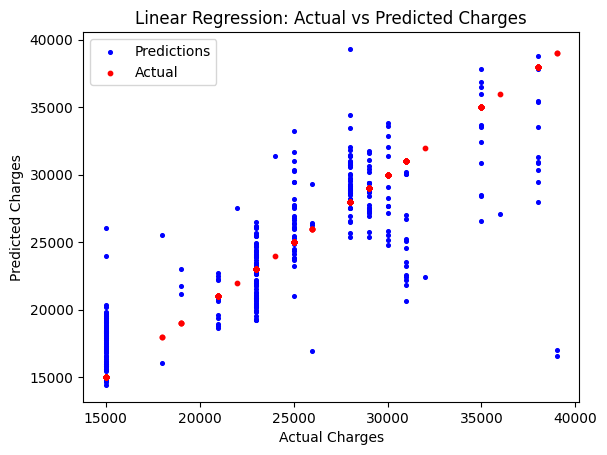

In [28]:
plt.scatter(y_test, y_pred1, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=10)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()

##### b) Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
model2 = regressor.fit(X_train, y_train)

In [30]:
y_pred2 = model2.predict(X_test)

In [31]:
error2 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,y_pred2)
error2.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,y_pred2)
error2.append(mape)

#r2
rs = r2_score(y_test,y_pred2)
error2.append(rs)
error2


[1415.5083333333334, 0.05839313653877838, 0.7732124372357241]

In [32]:
err2 = pd.DataFrame(error2).T
err2.columns=['MAE','MAPE','R2']
err2

,MAE,MAPE,R2
0,1415.508333,0.058393,0.773212


In [33]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.7697710478159323

In [34]:
model2.score(X_test,y_test)

0.7732124372357241

In [35]:
## For train
pred2_tr = model2.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred2_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred2_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred2_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,478.274086,0.019985,0.965624


In [36]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.965102356322178

#### Plotting Error

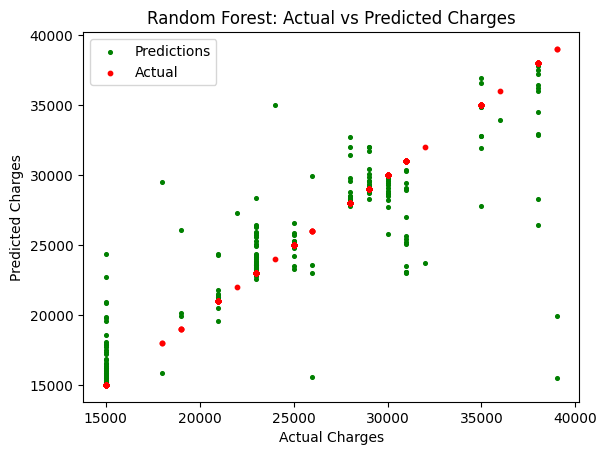

In [37]:
plt.scatter(y_test, y_pred2, color='green', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=10)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.legend()
plt.show()

## Decision Tree


In [38]:
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor(random_state = 0)  
model3 = dt.fit(X_train, y_train) 

predTree = model3.predict(X_test)

In [39]:
error3 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predTree)
error3.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predTree)
error3.append(mape)

#r2
rs = r2_score(y_test,predTree)
error3.append(rs)


err3 = pd.DataFrame(error3).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,1275.0,0.049857,0.663332


In [40]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.6582228391221758

In [41]:
## For train
pred3_tr = model3.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred3_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred3_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred3_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,12.36476,0.000468,0.998664


In [42]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.9986434115453662

## gradient boosting


In [45]:
from sklearn.ensemble import GradientBoostingRegressor 

gb = GradientBoostingRegressor()
model4 = gb.fit(X_train, y_train)
predGb = model4.predict(X_test)

In [46]:
error4 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predGb)
error4.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predGb)
error4.append(mape)

#r2
rs = r2_score(y_test,predGb)
error4.append(rs)


err3 = pd.DataFrame(error4).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,1586.162726,0.062873,0.791487


In [47]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.7883225486341634

In [48]:
## For train
pred4_tr = model4.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred4_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred4_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred4_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,1156.346181,0.046835,0.878576


In [49]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.8767334395265508